# Import Packages

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import random

# Matplotlib Configuration

In [274]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

# Loading dataset

In [275]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(iris['data'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train Test split

In [276]:
def train_test_split(df, train_size, test_size):
    train = df.sample(frac=train_size, random_state=0)
    print("train_size:", train.shape)
    df.drop(train.index, inplace=True)
    test = df
    print("test_size:", test.shape)
    return train, test

In [277]:
train_size, test_size = 0.8, 0.2
train, test = train_test_split(df.copy(), train_size, test_size)

train_size: (120, 5)
test_size: (30, 5)


In [278]:
y_train_1 = train['target'].to_numpy()
X_train = train.drop('target', axis=1).to_numpy()

y_test_1 = test['target'].to_numpy()
X_test = test.drop('target', axis=1).to_numpy()

y_train.shape, X_train.shape, y_test.shape, X_test.shape

((120, 3), (120, 4), (30, 3), (30, 4))

# Perceptron

$$E_p(w) = -\Sigma_{n \in M} w^T\phi_nt_n$$

$$w^{(t + 1)} = w^{(t)} - \eta \nabla E_p(w)$$

## Removing `target==2` samples

In [279]:
p_train = train.drop(train[train['target'] == 2].index)
p_test = test.drop(test[test['target'] == 2].index)

p_y_train = p_train['target'].to_numpy()
p_X_train = p_train.drop('target', axis=1).to_numpy()

p_y_test = p_test['target'].to_numpy()
p_X_test = p_test.drop('target', axis=1).to_numpy()

In [280]:
len(p_X_train), len(p_y_train)

(79, 79)

## Convert 0 to -1

In [281]:
for index, i in enumerate(p_y_train):
    if i == 0:
        p_y_train[index] = -1

In [282]:
for index, i in enumerate(p_y_test):
    if i == 0:
        p_y_test[index] = -1

## Number of misclassified

In [283]:
def misclassified_list(w):
    misclassified_arr = list()
    for index, x in enumerate(p_X_train):
        if w.dot(x) * p_y_train[index] <= 0:
            misclassified_arr.append((x, p_y_train[index]))
    
    return misclassified_arr

## Train Perceptron Method

In [284]:
def train_perceptron(learning_rate = 0.001):
    all_misclassified = list()
    w = np.zeros(p_X_test.shape[1])
    misclassified = misclassified_list(w)
    current_misclassified = len(misclassified)
    all_misclassified.append(current_misclassified)
    counter = 0
    
    while len(misclassified) > 0:
        i = random.randint(0, len(misclassified) - 1)
        x, target = misclassified[i]
        w += learning_rate * target * x
            
        misclassified = misclassified_list(w)
        current_misclassified = len(misclassified)
        all_misclassified.append(current_misclassified)
    
    return w, all_misclassified


w_perceptron, all_misclassified = train_perceptron()

In [285]:
w_perceptron

array([-0.0022, -0.0059,  0.0082,  0.0027])

In [286]:
all_misclassified[0]

79

In [287]:
all_misclassified[-1]

0

## Plotting the Iterations

In [288]:
def plotting(misclassified, is_train):
    if len(misclassified) is 0:
        return "There isn't any misclassified point"
    if is_train:
        plt.title("Misclassified points number per iteration in train")
    else:
        plt.title("Misclassified points number per iteration in train")
    plt.xlabel("Iteration No")
    plt.ylabel("Misclassified No")
    plt.plot(misclassified)

## Train misclassified No.

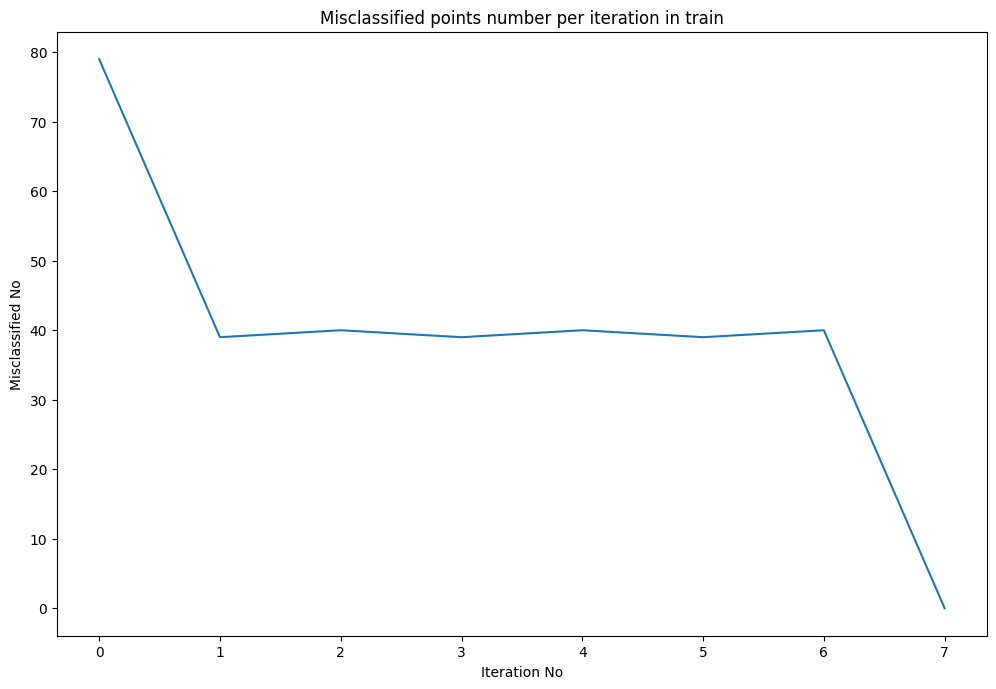

In [289]:
plotting(all_misclassified, True)

## Test Perceptron Method

In [290]:
def test_perceptron(w):
    misclassified_arr, loss = list(), 0
    for index, x in enumerate(p_X_test):
        if w.dot(x) * p_y_test[index] <= 0:
            misclassified_arr.append((x, p_y_test[index]))
            loss += w.dot(x) * p_y_test[index]
    return loss, misclassified_arr

loss, test_misclassified = test_perceptron(w_perceptron)

In [291]:
plotting(test_misclassified, False)

"There isn't any misclassified point"

## Confision Matrix

In [292]:
def confusion_matrix_perceptron():
    c1_c1, c1_c2, c2_c1, c2_c2 = 0, 0, 0, 0

    for index, x in enumerate(p_X_test):
        if p_y_test[index] == 1:
            if w_perceptron.dot(x) > 0:
                c1_c1 += 1
            else:
                c1_c2 += 1
        else:
            if w_perceptron.dot(x) > 0:
                c2_c1 += 1
            else:
                c2_c2 += 1
                
    print("confusion Matrix")
    print(f" {c1_c1} \t {c1_c2} \n {c2_c1} \t {c2_c2}")
    
confusion_matrix_perceptron()

confusion Matrix
 11 	 0 
 0 	 10


# Logistic Regression

As it mentioned in Bishop book we have the following equations:
$$
p(C_k|\phi) = y_k(\phi) = \frac{e^{a_k}}{\Sigma_j e^{a_j}}
$$

where

$$
a_k = w_k^T\phi
$$

$$
E(w_1,\: ..., \: w_k) = -ln (p(T|w_1, \: ..., \: w_k)) = -\Sigma_{n=1}^{N} \Sigma_{k=1}^{K} t_{nk} ln (y_{nk})
$$

$$
\nabla_{w_j} E(w_1, \: ..., \: w_k) = \Sigma_{n = 1}^{N} (y_{nj} - t_{nj})\phi_n
$$

# a)


## One Hot

In [293]:
train['C0'] = 0
train['C1'] = 0
train['C2'] = 0

test['C0'] = 0
test['C1'] = 0
test['C2'] = 0

for index, row in train.iterrows():
    if row['target'] == 2:
        train.loc[index, 'C2'] = 1
    elif row['target'] == 1:
        train.loc[index, 'C1'] = 1
    elif row['target'] == 0:
        train.loc[index, 'C0'] = 1

for index, row in test.iterrows():
    if row['target'] == 2:
        test.loc[index, 'C2'] = 1
    elif row['target'] == 1:
        test.loc[index, 'C1'] = 1
    elif row['target'] == 0:
        test.loc[index, 'C0'] = 1

In [294]:
y_train = train[["C0", "C1", "C2"]].to_numpy()
y_test = test[["C0", "C1", "C2"]].to_numpy()

## Softmax Function

In [295]:
def softmax(k, x, w_s):
    w_k = w_s[k]
    a_k = w_k.dot(x)
    upper, lower = np.exp(a_k), 0
    
    for i, w in enumerate(w_s):
        a_j = w.dot(x)
        lower += np.exp(a_j)
    
    return upper / lower


## Loss function

In [296]:
def calc_loss(w):
    loss = 0
    for i, x in enumerate(X_train):
        for k in [0, 1, 2]:
            loss -= y_train[i][k] * np.log(softmax(k, x, w))
    
    return loss

## Updating weights

In [297]:
def weight_update(learning_rate, current_w, w_s, k):
    gradient = 0
    for index, x in enumerate(X_train):
        gradient += (softmax(k, x, w_s) - y_train[index][k]) * x
    
    return current_w - learning_rate * gradient

## Logistic Regression

In [298]:
def logistic_regression(learning_rate, iteration_no):
    w1 = np.zeros(X_test.shape[1])
    w2 = w1.copy()
    w3 = w1.copy()
    losses = list()
    
    for i in range(iteration_no):
        all_weights = [w1, w2, w3]
        w1 = weight_update(learning_rate, w1, all_weights, 0)
        w2 = weight_update(learning_rate, w2, all_weights, 1)
        w3 = weight_update(learning_rate, w3, all_weights, 2)
        loss = calc_loss([w1, w2, w3])
        losses.append(loss)
        
    return [w1, w2, w3], losses

In [299]:
w_s, training_loss = logistic_regression(0.005, 1000)

In [300]:
training_loss

[231.1927331198307,
 1220.4368899214367,
 1348.353290604769,
 1197.3551260605723,
 1327.7183628292357,
 734.4295550456424,
 288.57172731711694,
 703.3039995375109,
 921.6102757813967,
 520.9810961329141,
 305.46275305322564,
 854.5544360342486,
 72.71670254286336,
 627.0988218153631,
 326.91822359144567,
 897.9219482671386,
 36.854393263788594,
 149.75238871029296,
 959.1254053151872,
 755.6554221088061,
 70.63390754312415,
 256.56205008712806,
 1182.9148485968915,
 229.4444134703588,
 739.1610918723941,
 524.0148089988304,
 410.39229258168933,
 740.5368317938702,
 139.97248825337198,
 864.5830459703726,
 29.830568061555958,
 190.31257312094996,
 807.8759159346619,
 624.2784566385111,
 242.73769349498886,
 695.0287040945475,
 162.93953010773043,
 871.648739019349,
 19.361077520200126,
 45.07379700367,
 500.5268663138167,
 723.9578280311979,
 112.2352651128203,
 774.568524762868,
 57.39516197291571,
 540.3247786801322,
 313.6238024569342,
 769.0893639151228,
 51.388098969663844,
 478.51

In [301]:
def entropy_plot(loss, is_training):
    if is_training:
        plt.title("loss per iteration in training")
    else:
        plt.title("loss per iteration in testing")
        
    plt.plot(loss)
    plt.xlabel("iteration no.")
    plt.ylabel("loss")

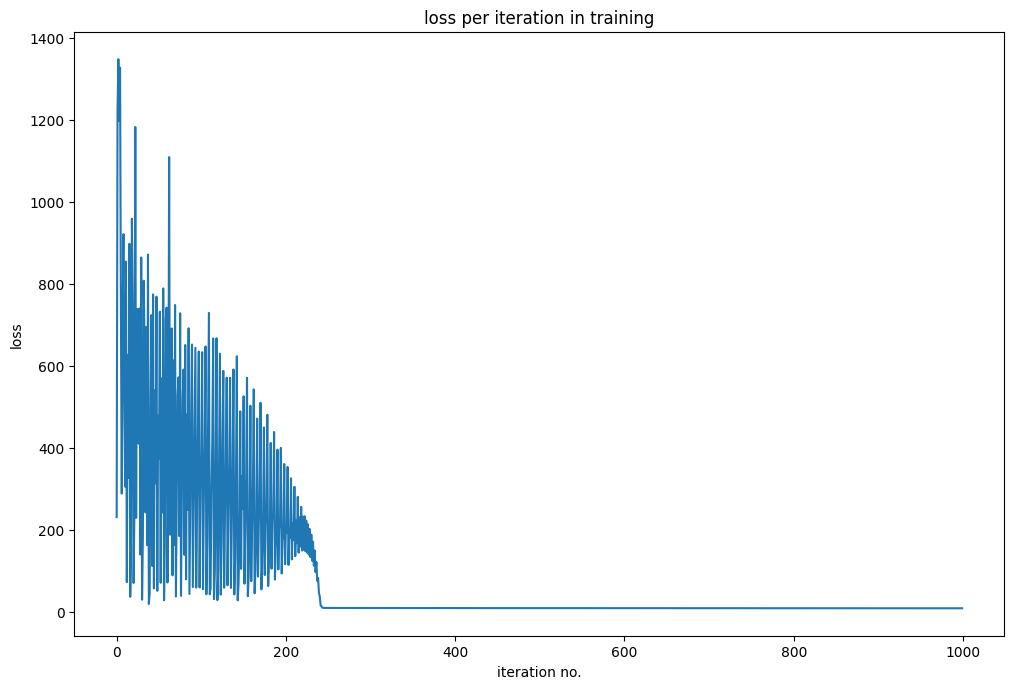

In [302]:
entropy_plot(training_loss, True)

## Confusion Matrix Logistic Regression

In [320]:
def get_confusion_matrix_logistic():
#     w1, w2, w3
    predicted = X_test.dot(np.array(w_s).T)
    predicted = np.argmax(predicted, axis = 1)
    
    columns = ['actual 0', 'actual 1', 'actual 2']
    indices = ['predicted 0', 'predicted 1', 'predicted 2']
    
    df = pd.DataFrame(0, index=indices, columns=columns)
    df.loc['predicted 0', 'actual 0'] = np.sum((y_test_1 == 0) & (predicted == 0))
    df.loc['predicted 0', 'actual 1'] = np.sum((y_test_1 == 1) & (predicted == 0))
    df.loc['predicted 0', 'actual 2'] = np.sum((y_test_1 == 2) & (predicted == 0))
    df.loc['predicted 1', 'actual 0'] = np.sum((y_test_1 == 0) & (predicted == 1))
    df.loc['predicted 1', 'actual 1'] = np.sum((y_test_1 == 1) & (predicted == 1))
    df.loc['predicted 1', 'actual 2'] = np.sum((y_test_1 == 2) & (predicted == 1))
    df.loc['predicted 2', 'actual 0'] = np.sum((y_test_1 == 0) & (predicted == 2))
    df.loc['predicted 2', 'actual 1'] = np.sum((y_test_1 == 1) & (predicted == 2))
    df.loc['predicted 2', 'actual 2'] = np.sum((y_test_1 == 2) & (predicted == 2))
    return df

In [322]:
confusion_matrix = get_confusion_matrix_logistic()

In [323]:
confusion_matrix

,actual 0,actual 1,actual 2
predicted 0,10,0,0
predicted 1,0,9,0
predicted 2,0,2,9


## Accuracy

In [319]:
accuracy = np.trace(confusion_matrix.to_numpy() / X_test.shape[0])
accuracy

0.9333333333333333

# B

## Loss Function

In [327]:
def calc_loss_regularized(w, regularized_w):
    loss = (w[0].dot(w[0]) + w[1].dot(w[1]) + w[2].dot(w[2])) * regularized_w
    for i, x in enumerate(X_train):
        for k in [0, 1, 2]:
            loss -= y_train[i][k] * np.log(softmax(k, x, w))
    
    return loss

## Updating Weights

In [326]:
def weight_update_l2(learning_rate, current_w, w_s, k, regularized_w):
    gradient = current_w * regularized_w
    for index, x in enumerate(X_train):
        gradient += (softmax(k, x, w_s)) - y_train[index][k] * x
    return current_w - learning_rate * gradient

## Regularized Logistic Regression

In [ ]:
def logistic_regression(learning_rate, iteration_no):
    w1 = np.zeros(X_test.shape[1])
    w2 = w1.copy()
    w3 = w1.copy()
    losses = list()
    
    for i in range(iteration_no):
        all_weights = [w1, w2, w3]
        w1 = weight_update(learning_rate, w1, all_weights, 0)
        w2 = weight_update(learning_rate, w2, all_weights, 1)
        w3 = weight_update(learning_rate, w3, all_weights, 2)
        loss = calc_loss([w1, w2, w3])
        losses.append(loss)
        
    return [w1, w2, w3], losses

In [330]:
def regularized_logistic_regression(learining_rate, iteration_no, regularized_w):
    w0 = np.zeros(X_test.shape[1])
    w1 = w0.copy()
    w2 = w0.copy()
    losses = list()

    for i in range(iteration_no):
        all_weights = [w0, w1, w2]
        w0 = weight_update_l2(learning_rate, w0, all_weights, 0, regularized_w)
        w1 = weight_update_l2(learning_rate, w1, all_weights, 1, regularized_w)
        w2 = weight_update_l2(learning_rate, w1, all_weights, 2, regularized_w)
        loss = calc_loss_regularized([w0, w1, w2], regularized_w)
        losses.append(loss)
    
    return [w0, w1, w2], losses

## Regularized Weight = 10

In [331]:
w_s, training_loss = regularized_logistic_regression(0.005, 500, 10)

get_confusion_matrix_logistic()

,actual 0,actual 1,actual 2
predicted 0,7,0,0
predicted 1,0,0,0
predicted 2,3,11,9


## Regularized Weight = 1

In [334]:
w_s, training_loss = regularized_logistic_regression(0.005, 500, 1)

get_confusion_matrix_logistic()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,actual 0,actual 1,actual 2
predicted 0,10,11,9
predicted 1,0,0,0
predicted 2,0,0,0


## Regularized Weight = 0.1

In [335]:
w_s, training_loss = regularized_logistic_regression(0.005, 500, 0.01)

get_confusion_matrix_logistic()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,actual 0,actual 1,actual 2
predicted 0,10,11,9
predicted 1,0,0,0
predicted 2,0,0,0
